In [1]:
import matplotlib.pyplot as plt
%matplotlib auto

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score


import numpy as np
import seaborn as sns
import pandas 
from pandas import read_csv

import xgboost
import pandas

import cv2
import cvlib

Using matplotlib backend: agg


Using TensorFlow backend.


In [2]:
df_train = read_csv("training_solutions_rev1.csv")

df_train

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [3]:
df_new = pandas.DataFrame()

df_new['GalaxyID'] = df_train['GalaxyID']
df_new['Class1.1'] = df_train['Class1.1']
df_new['Class1.2'] = df_train['Class1.2']
df_new['Class1.3'] = df_train['Class1.3']

df_new 

,GalaxyID,Class1.1,Class1.2,Class1.3
0,100008,0.383147,0.616853,0.000000
1,100023,0.327001,0.663777,0.009222
2,100053,0.765717,0.177352,0.056931
3,100078,0.693377,0.238564,0.068059
4,100090,0.933839,0.000000,0.066161
...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000
61574,999950,0.901216,0.098784,0.000000
61575,999958,0.202841,0.777376,0.019783
61576,999964,0.091000,0.909000,0.000000


In [4]:
df_temp = df_new.sort_values("Class1.1", axis = 0, ascending = False)
f1 = df_temp['GalaxyID'][0:100]

df_temp = df_new.sort_values("Class1.2", axis = 0, ascending = False)
f2 = df_temp['GalaxyID'][0:100]

df_temp = df_new.sort_values("Class1.3", axis = 0, ascending = False)
f3 = df_temp['GalaxyID'][0:100]

In [5]:
f1,f2,f3

(39466    675202
 22903    434670
 55686    913723
 40894    696039
 54239    891579
           ...  
 26018    480384
 6977     203026
 8040     217984
 54583    897154
 12389    283037
 Name: GalaxyID, Length: 100, dtype: int64, 27743    506329
 52983    872766
 12647    287199
 41542    706547
 3199     148257
           ...  
 772      111514
 19939    392544
 7799     214833
 36753    637212
 9960     247817
 Name: GalaxyID, Length: 100, dtype: int64, 17392    356310
 16618    345209
 58526    955102
 1791     126783
 61345    996629
           ...  
 26888    493222
 3088     146594
 37545    648446
 22483    428697
 54722    899303
 Name: GalaxyID, Length: 100, dtype: int64)

In [6]:
import shutil

for i in f1:
    shutil.copy2(f"./images_training_rev1/{i}.jpg", "./echant/f1")
    
for i in f2:
    shutil.copy2(f"./images_training_rev1/{i}.jpg", "./echant/f2")

for i in f3:
    shutil.copy2(f"./images_training_rev1/{i}.jpg", "./echant/f3")    

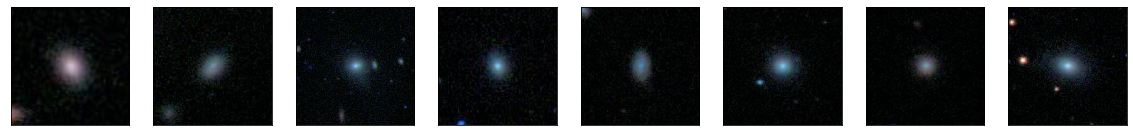

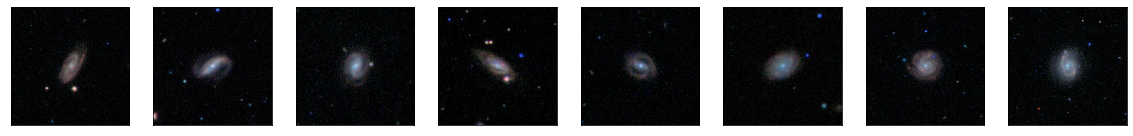

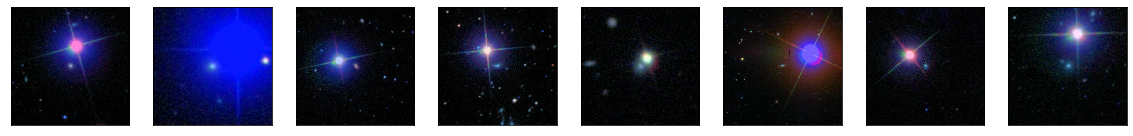

In [7]:
def buildim(arr,val_break): # pour avoir les x premiéres de chaques classes
    i =1
    plt.figure(figsize=(20,100))
    
    for id_f in arr:
        image = cv2.imread(f'./images_training_rev1/{id_f}.jpg')
        plt.subplot(1, val_break, i)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i >= (val_break+1): 
            break
            
buildim(f1,8) #f1 = array top 100 class 1.1 + 8 images
buildim(f2,8) #f2 = array top 100 class 1.2 + 8 images
buildim(f3,8) #f3 = array top 100 class 1.3 + 8 images

In [8]:
img = cv2.imread("./images_training_rev1/480384.jpg")

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
